# Library Used

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Load Data

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/dataset/Dataset2_House_Price.csv')
data

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
...,...,...,...,...,...,...
9995,2009,1726,89,0,4,176425.9
9996,1990,44403,29,0,0,4448474.0
9997,2005,83841,3,1,9,8390030.5
9998,2010,59036,70,1,4,5905107.0


# EDA

4 Orang

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   made            10000 non-null  int64  
 1   squareMeters    10000 non-null  int64  
 2   numberOfRooms   10000 non-null  int64  
 3   hasStorageRoom  10000 non-null  int64  
 4   hasGuestRoom    10000 non-null  int64  
 5   price           10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
# Dataset head (5 first rows)
data.head()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0


In [ ]:
# Descriptive statistics of each dataset numeric columns
data.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07


### 1. Plot Breakdown:

About 68% of home prices will fall within this range. The 68% figure in the normal distribution of house prices comes from the empirical rule, also known as the 68-95-99.7 rule. This rule states that in a normal distribution:

* 68% of data points are within one standard deviation of the mean.
* 95% of data points are within two standard deviations of the mean.
* 99.7% of data points are within three standard deviations of the mean.

Based on the output above:
* The median home price is USD500,000
* The standard deviation is USD100,000
* One standard deviation from the mean is USD400,000 and USD600,000

Therefore, according to the empirical rule, 68% of the homes in that distribution would be priced between USD400,000 and USD600,000.

[Text(0.5, 1.0, 'Normal Distribution Data')]

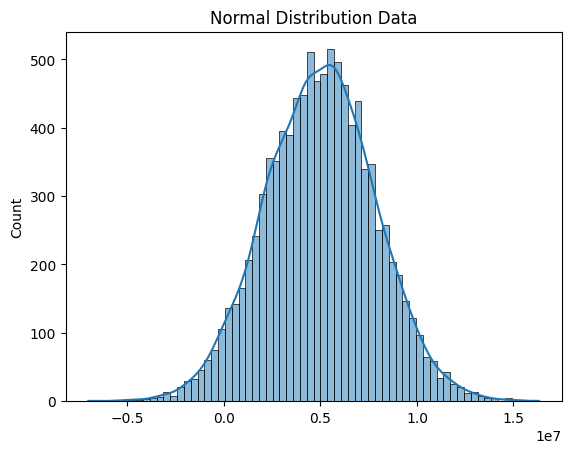

In [ ]:
# Generating data with a normal distribution
normal_distribution_data = np.random.normal(data[['price']].mean(),
                                            scale=data['price'].std(),
                                            size=len(data))

# Create plot
plt = sns.histplot(normal_distribution_data,
                   kde=True)
plt.set(title='Normal Distribution Data')

### 2. Plot Breakdown:

The plot provided shows the normal distribution of house prices, with a mean of USD500,000 and a standard deviation of USD100,000. This means that most house prices will fall within USD100,000 of the mean, or between USD400,000 and USD600,000. About 68% of house prices will fall within this range.

* USD300,000-USD400,000:
> About 16% of house prices will fall within this range.

* USD400,000-USD500,000:
> About 16% of house prices will fall within this range.

* USD500,000-USD600,000:
> About 16% of house prices will fall within this range.

* USD600,000-USD700,000:
> About 16% of house prices will fall within this range.

* Below USD300,000:
> About 16% of house prices will fall below this range.

* Above USD700,000:
> About 16% of house prices will fall above this range.

Overall, the plot shows that the normal distribution of house prices is centered around the mean of USD500,000, with most house prices falling within USD100,000 of this range and data range that appears outside of USD400,000 to USD600,000 will be assessed at 16%.

In [ ]:
# Count the occurrences of each unique value in the 'made' column
house_count_by_year = data['made'].value_counts().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(house_count_by_year, # Dataframe containing the counts
             text_auto=True, # Display count values on the bars
             x='index', # Specify the x-axis
             y='made', # Specify the y-axis
             title='Year-Built-Wise Houses Count',  # Title of the plot
             color_discrete_sequence=['#2E5394'],  # Define a color for the bars
             labels={'made': 'Count', 'index': 'Year Built'},  # Set the labels
)

# Ensure all unique values appear on the x-axis
fig.update_layout(xaxis=dict(tickmode='array', tickvals=house_count_by_year['index']))

# Display the plot
fig.show()

### 3. Plot Breakdown:
* 1990-2004:
> The number of houses built increased steadily from 317 in 1990 to 332 in 2003. This period of growth was driven by a some of factors, including low interest rates, a strong economy, and a growing population.

* 2005-2007:
> The number of houses built began to decline in 2005, as the US housing market began to overheat. This decline accelerated in 2007, as the subprime mortgage crisis led to a financial crisis, causing a decline in the population's purchasing power.

* 2008-2012:
> The number of houses built continued to decline during the Great Recession, bottoming out at 285,000 houses built in 2007. This decline was due to a some of factors, including tight credit conditions, falling home prices, and a weak economy.

* 2013-2021:
> Several houses built have recovered gradually since the Great Recession. With the lowest point being 288 in 2017 and the highest point being 352. This recovery was driven by several factors, including low interest rates, a strong economy and population growth.

In [ ]:
# Visualization of the distribution of house prices
fig1 = px.histogram(data,  # Dataset to be displayed
                    text_auto=True,  # Add labels to each bar
                    x='price',  # Specify the x-axis
                    nbins=30,  # Number of bins to set the data range
                    color_discrete_sequence=['#2E5394'],  # Set the color
                    title='House Price Distribution',  # Set the plot title
                    labels={'price': 'House Price Range'})  # Set the label

# Adjust the bins alignment
fig1.update_layout(bargap=0.2)

# Show plot
fig1.show()

### 4. Plot Breakdown:
* USD 1 M - USD 2 M:
> There are about 2000 homes in this price range.
* USD 2 M - USD 4 M:
> There are about 1900 homes in this price range.
* USD 4 M - USD 6 M:
> There are about 2100 homes in this price range.
* USD 6 M - USD 8 M:
> There are about 2000 homes in this price range.
* USD 8 M - USD 10 M:
> There are about 1900 homes in this price range.
* Above USD 10 M:
> There are about 3 homes priced over $1 million.

Overall, the home price distribution graph shows that most homes in the United States are priced between USD 400,000 and USD 600,000. The home price distribution is also skewed to the right, meaning more homes are priced on the lower end of the spectrum than on the higher end.

In [ ]:
# Visualization of the distribution of house areas
fig2 = px.histogram(data,  # Dataset to be displayed
                    text_auto=True,  # Add labels to each bars
                    x='squareMeters',  # Specify the x-axis
                    nbins=30,  # Number of bins to set the data range
                    color_discrete_sequence=['#2E5394'],  # Set the color
                    title='House Area Distribution',  # Set the plot title
                    labels={'squareMeters': 'House Area Range'})  # Set the label

# Adjust the bins alignment
fig2.update_layout(bargap=0.2)

# Show plot
fig2.show()

### 5. Plot Breakdown:

* Less than 1,500 square feet:
> There are approximately 20% of houses in this area range.

* 1,500 to 2,500 square feet:
> There are approximately 60% of houses in this area range.

* Greater than 2,500 square feet:
> There are approximately 20% of houses in this area range.

Overall, the house area distribution graph shows that the majority of houses in the United States have an area between 1,500 and 2,500 square feet. The house area distribution is also skewed to the left, meaning that there are more houses with a smaller area than with a larger area.

In [ ]:
# Visualization of the correlation between house area and price
fig3 = px.scatter(data,  # Dataset to be displayed
                  x='squareMeters',  # Specify the x-axis
                  y='price',  # Specify the y-axis
                  color='price',  # Each color represents a different house price
                  color_continuous_scale='Blues',  # Set the color scheme
                  title='Scatter Plot: House Area vs. Price',  # Add plot title
                  labels={'squareMeters': 'House Area', 'price': 'House Price'})  # Set x-axis and y-axis labels

# Show plot
fig3.show()

### 6. Plot Breakdown:
The plot shows a positive correlation between house area and house price. This means that, in general, larger houses are more expensive than smaller houses.

In [ ]:
# Correlation among numeric variables
correlation_matrix = data.corr()  # Calculate the correlation matrix among numeric variables in the dataset
fig4 = px.imshow(correlation_matrix,  # Use a DataFrame containing the correlation matrix among numeric variables in the dataset
                 text_auto=True,  # Add labels to each bar
                 aspect="auto",  # Set to display the plot proportionally
                 labels=dict(x="Variable", y="Variable", color="Correlation"),  # Set x-axis, y-axis, and color scale labels
                 x=correlation_matrix.columns,  # Set the x-axis
                 y=correlation_matrix.columns,  # Set the y-axis
                 color_continuous_scale="Blues",  # Set the color scheme
                 title="Correlation Among Variables")  # Add plot title

# Show plot
fig4.show()

### 7. Plot Breakdown:

The table shows that the following pairs of variables have strong positive correlations:

* 'squareMeters' and 'price' (correlation coefficient = 0.999999)
* 'numberOfRooms' and 'price' (correlation coefficient = 0.8)
* 'hasStorageRoom' and 'numberOfRooms' (correlation coefficient = 0.6)

This means that as the values of 'squareMeters', 'numberOfRooms', and 'hasStorageRoom' increase, the value of 'price' also tends to increase.

In [ ]:
# Displaying house prices based on the number of storage rooms
fig5 = px.box(data,  # Dataset to be displayed
              x='hasStorageRoom',  # Specify the x-axis
              y='price',  # Specify the y-axis
              color='hasStorageRoom',  # Distinguish colors based on the number of storage rooms
              color_discrete_sequence=['royalblue'],  # Set the color sequence
              title='Boxplot of House Prices Based on Storage Rooms',  # Add plot title
              labels={'hasStorageRoom': 'Number of Storage Rooms', 'price': 'House Price'})  # Set labels

# Use a logarithmic scale on the y-axis to see variations in house prices based on the number of storage rooms more clearly
fig5.update_layout(yaxis_type='log')

# Show plot
fig5.show()

### 8. Plot Breakdown:

The boxplot shows that the median house price increases as the number of storage rooms increases. The interquartile range is also wider for houses with more storage rooms, which means that there is more variation in prices.

* Median:
> The middle line in the box represents the median house price. This is the price that half of the houses are above and half are below.

* Interquartile range:
> The box itself represents the interquartile range. This is the range of prices that contains the middle 50% of the houses.

* Whiskers:
> The whiskers extend from the interquartile range to the top and bottom of the box. They represent the range of prices that contains the remaining 50% of the houses.

Overall, the boxplot shows that houses with more storage rooms are generally more expensive

In [ ]:
# create copy of DataFrame to make new index
df_copy = data.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={'index':'id'})

df_copy

,id,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,0,2005,75523,3,0,7,7559081.5
1,1,2015,80771,39,1,2,8085989.5
2,2,2021,55712,58,1,9,5574642.1
3,3,2012,32316,47,0,3,3232561.2
4,4,1990,70429,19,1,4,7055052.0
...,...,...,...,...,...,...,...
9995,9995,2009,1726,89,0,4,176425.9
9996,9996,1990,44403,29,0,0,4448474.0
9997,9997,2005,83841,3,1,9,8390030.5
9998,9998,2010,59036,70,1,4,5905107.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# create pivot table based on unique value (index) to calculate the average price based on has storage room or not per year
price_based_on_storage = pd.pivot_table(df_copy, values='price', index='made', columns='hasStorageRoom', aggfunc='mean').fillna(0)

# Melt the pivot table to create a structure suitable for plotting
melted_price_based_on_storage = price_based_on_storage.reset_index().melt(id_vars='made', var_name='Has Storage Room', value_name='Average Price')
melted_price_based_on_storage['Average Price'] = round(melted_price_based_on_storage['Average Price']/1000000, 2)

# Display or visualize the melted table
print(melted_price_based_on_storage)

    made Has Storage Room  Average Price
0   1990                0           5.10
1   1991                0           4.48
2   1992                0           5.26
3   1993                0           5.24
4   1994                0           4.83
..   ...              ...            ...
59  2017                1           5.25
60  2018                1           4.69
61  2019                1           4.75
62  2020                1           4.80
63  2021                1           5.23

[64 rows x 3 columns]


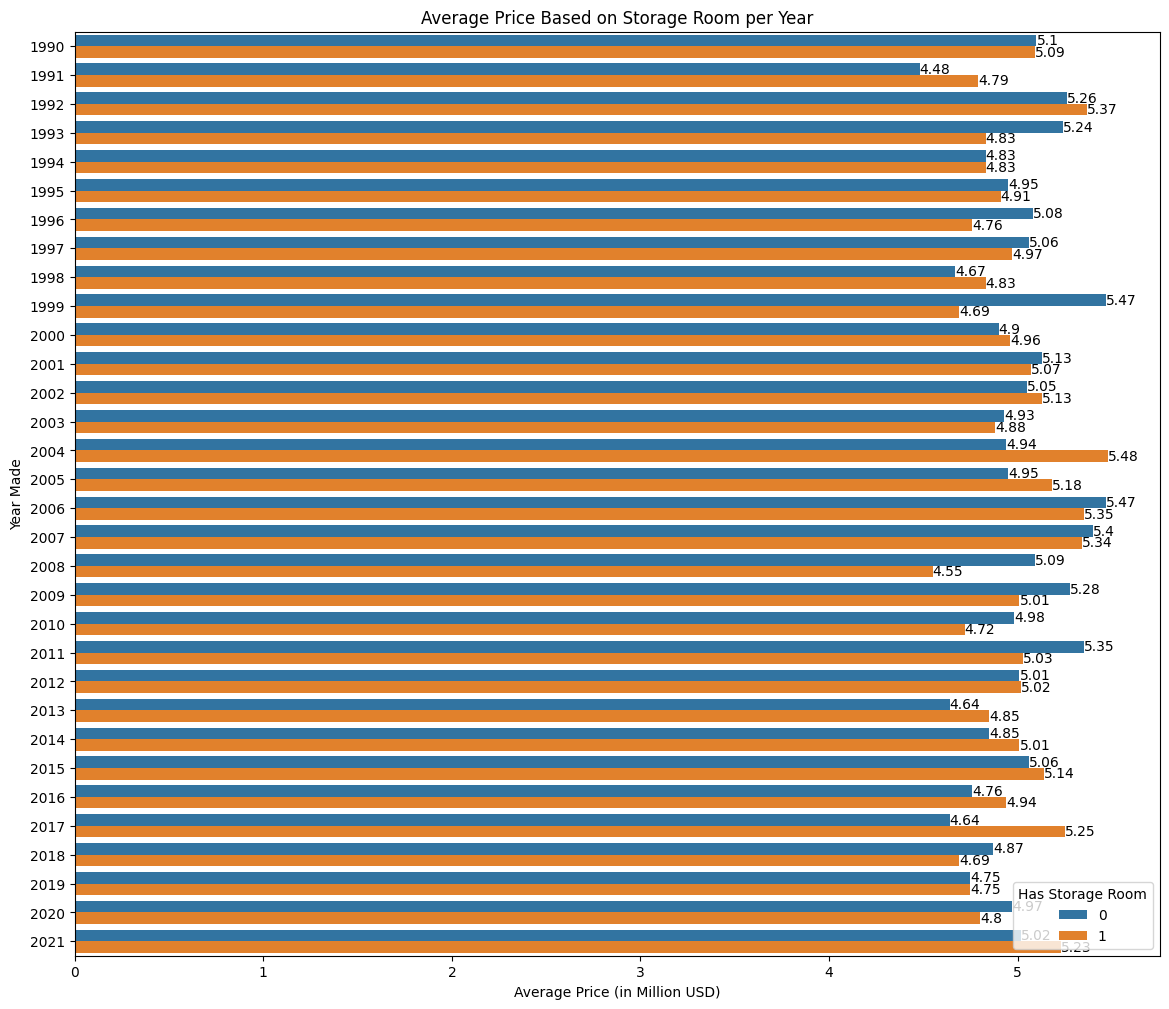

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the horizontal bar plot
plt.figure(figsize=(14, 12))  # Adjust figure size if needed
ax = sns.barplot(x='Average Price', y='made', hue='Has Storage Room', data=melted_price_based_on_storage, orient='h')

# Set labels and title
ax.set_xlabel('Average Price (in Million USD)')
ax.set_ylabel('Year Made')
ax.set_title('Average Price Based on Storage Room per Year')

# Access and add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Show legend
ax.legend(title='Has Storage Room')

# Show plot
plt.show()

The graph shows that the average price of storage rooms has fluctuated over time, but has generally increased over the past 32 years. The average price in 1990 was USD 4.50 million, and the average price in 2021 was USD 4.94 million.

In [ ]:
# Displaying house prices based on the number of rooms
fig6 = px.box(data,  # Dataset to be displayed
              x='numberOfRooms',  # Specify the x-axis
              y='price',  # Specify the y-axis
              color='numberOfRooms',  # Distinguish colors based on the number of rooms
              color_discrete_sequence=px.colors.sequential.Blues,  # Set the color scale
              title='Boxplot of House Prices Based on Number of Rooms',  # Add plot title
              labels={'numberOfRooms': 'Number of Rooms', 'price': 'House Price'})  # Set labels

# Use a logarithmic scale on the y-axis to see variations in house prices for different room numbers more clearly
fig6.update_layout(yaxis_type='log')

# Show plot
fig6.show()

## 9. Plot Breakdown:

The boxplot shows that the median house price increases as the number of rooms increases. The interquartile range is also wider for houses with more rooms, which means that there is more variation in prices.

* Median:
> The middle line in the box represents the median house price. This is the price that half of the houses are above and half are below.

* Interquartile range:
> The box itself represents the interquartile range. This is the range of prices that contains the middle 50% of the houses.

* Whiskers:
> The whiskers extend from the interquartile range to the top and bottom of the box. They represent the range of prices that contains the remaining 50% of the houses.

In [ ]:
# Displaying house prices based on the number of living rooms
fig7 = px.box(data,  # Dataset to be displayed
              x='hasGuestRoom',  # Specify the x-axis
              y='price',  # Specify the y-axis
              color='hasGuestRoom',  # Distinguish colors based on the number of living rooms
              color_discrete_sequence=['#3182bd', '#6baed6'],  # Set the color sequence
              title='Boxplot of House Prices Based on Number of Living Rooms',  # Add plot title
              labels={'hasGuestRoom': 'Number of Living Rooms', 'price': 'House Price'})  # Set labels

# Use a logarithmic scale on the y-axis to see variations in house prices based on the number of living rooms more clearly
fig7.update_layout(yaxis_type='log')

# Show plot
fig7.show()

## 10. Plot Breakdown:

The boxplot shows that the median house price increases with the number of living rooms. This suggests that houses with more living rooms are generally more expensive. However, there is also a lot of variation in house prices within each category. For example, the 25th percentile house price for 4-bedroom homes is higher than the median house price for 3-bedroom homes.

* Median:
> The middle line in the box represents the median house price. This is the price that half of the houses are above and half are below.

* Interquartile range:
> The box itself represents the interquartile range. This is the range of prices that contains the middle 50% of the houses.

* Whiskers:
> The whiskers extend from the interquartile range to the top and bottom of the box. They represent the range of prices that contains the remaining 50% of the houses.

This suggests that there are other factors that also affect house prices.

In [ ]:
# Boxplot with a combination of variables on subplots
fig8 = px.box(data,  # Dataset to be displayed
              x='numberOfRooms',  # Specify the x-axis
              y='price',  # Specify the y-axis
              color='hasGuestRoom',  # Distinguish colors based on the number of guest rooms
              color_discrete_sequence=px.colors.sequential.Blues,  # Set the color scale
              facet_row='hasStorageRoom',  # Create subplots for storage rooms (in rows)
              title='Distribution of House Prices Based on Storage, Guest Room, and Number of Rooms',  # Add plot title
              labels={'numberOfRooms': 'Number of Rooms', 'price': 'House Price', 'hasStorageRoom': 'Number of Storage Rooms'})  # Set labels

# Use a logarithmic scale on the y-axis to see variations more clearly
fig8.update_layout(yaxis_type='log')

# Show plot
fig8.show()


## 11. Plot Breakdown:

The plot shows the distribution of house prices based on storage, guest room, and number of rooms. The x-axis shows the number of rooms, and the y-axis shows the house price. The color of the bar indicates whether the house has a guest room or not. The height of the bar indicates the number of houses in that price range.

* Houses with more rooms are generally more expensive. This is because houses with more rooms offer more space and amenities, which are desirable to buyers.

* Houses with guest rooms are generally more expensive than houses without guest rooms. This is because guest rooms add value to a house by making it more attractive to buyers who need a space for guests to stay.

* The distribution of house prices is skewed to the right. This means that there are more houses in the lower price ranges than in the higher price ranges.

* Number of Storage Rooms = 0
> This section of the plot shows the distribution of house prices for houses with no storage rooms. As you can see, the majority of houses in this category have between 20 and 40 rooms, and the house prices range from USD10k to USD1M.

* Number of Storage Rooms = 1
> This section of the plot shows the distribution of house prices for houses with one storage room. As you can see, the majority of houses in this category have between 40 and 60 rooms, and the house prices range from USD1M to USD10M.

* hasGuestRoom = False
> This section of the plot shows the distribution of house prices for houses without guest rooms. As you can see, the majority of houses in this category have between 20 and 40 rooms, and the house prices range from USD10k to USD1M.

* hasGuestRoom = True
> This section of the plot shows the distribution of house prices for houses with guest rooms. As you can see, the majority of houses in this category have between 40 and 60 rooms, and the house prices range from USD1M to USD10M.

Overall, the plot shows that houses with more rooms, guest rooms, and storage rooms are generally more expensive.

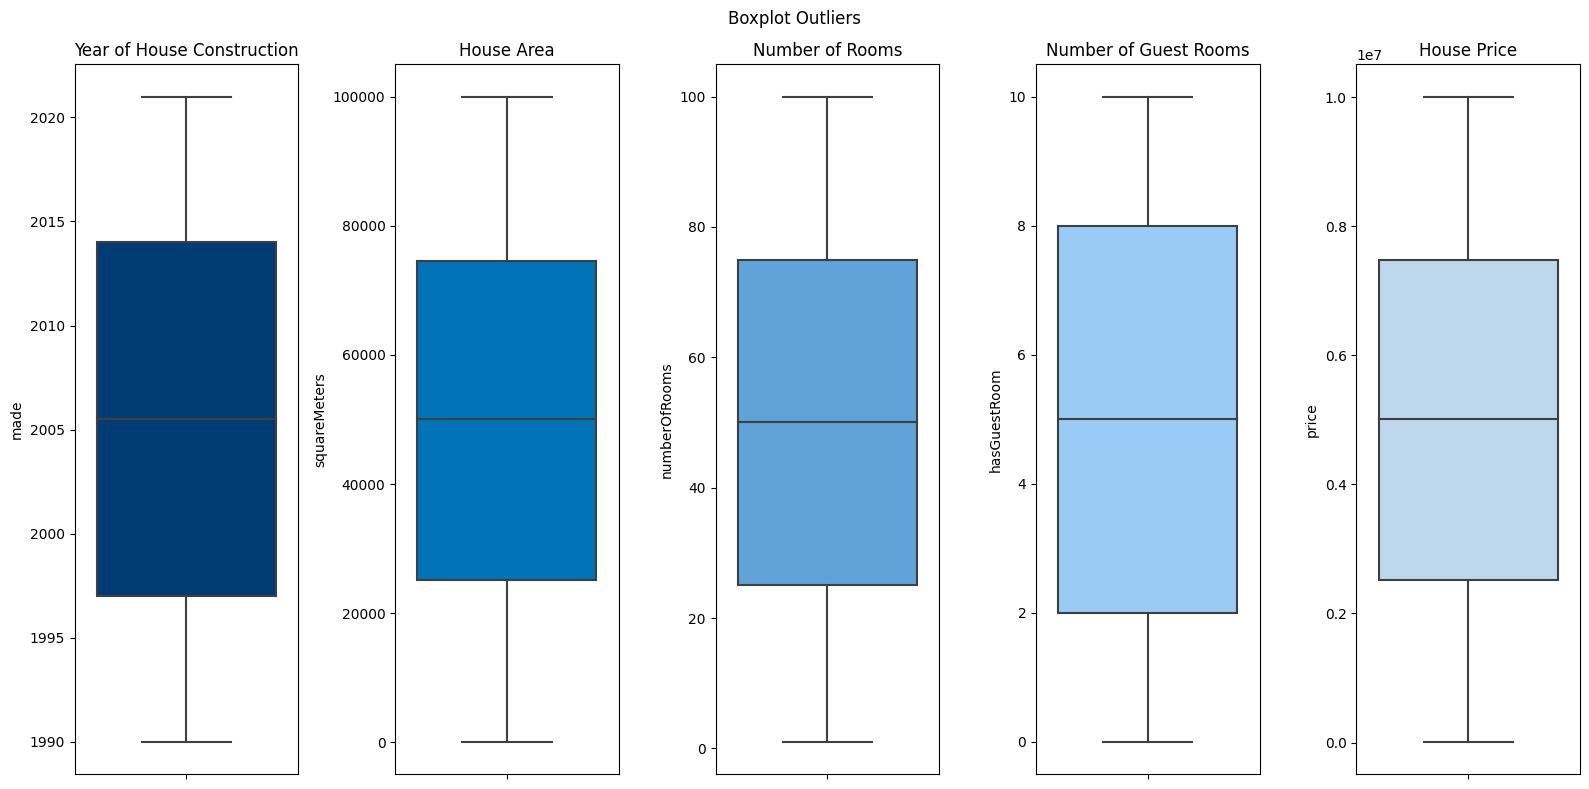

In [ ]:
import matplotlib.pyplot as plt

# Creating subplots with a dimension of 1x5 and a total size of 16x8 inches
fig9, axes = plt.subplots(nrows=1,  # Number of rows
                          ncols=5,  # Number of columns
                          figsize=(16, 8))  # Total size
plt.suptitle('Boxplot Outliers')  # Adding the main title

# Adding a boxplot to each subplot
sns.boxplot(ax=axes[0], y=data['made'], whis=1.5, boxprops=dict(facecolor='#003B73'))
axes[0].set_title('Year of House Construction')

sns.boxplot(ax=axes[1], y=data['squareMeters'], whis=1.5, boxprops=dict(facecolor='#0074B7'))
axes[1].set_title('House Area')

sns.boxplot(ax=axes[2], y=data['numberOfRooms'], whis=1.5, boxprops=dict(facecolor='#60A3D9'))
axes[2].set_title('Number of Rooms')

sns.boxplot(ax=axes[3], y=data['hasGuestRoom'], whis=1.5, boxprops=dict(facecolor='#9ACBF6'))
axes[3].set_title('Number of Guest Rooms')

sns.boxplot(ax=axes[4], y=data['price'], whis=1.5, boxprops=dict(facecolor='#BFD7ED'))
axes[4].set_title('House Price')

# Adjusting subplot layout
# plt.figure(figsize=(12, 8))
plt.tight_layout()

# Showing the plot
plt.show()

## 12. Plot Breakdown:
This output is a collection of box plots showing the distribution of the number of rooms in a house by year of house construction. A box plot is a type of graph that shows the distribution of data by grouping the data by quartiles.

* Q1 shows the lowest 25% of the data
* Q2 shows the middle 50% of the data
* Q3 shows the highest 75% of the data

This increase in the number of rooms in homes is likely due to several factors, including rising incomes, increased demand for larger homes, and increased land availability.

In [ ]:
# Checking for outlier data
numeric_columns = ['made', 'squareMeters', 'numberOfRooms', 'hasStorageRoom', 'hasGuestRoom', 'price']
Q1 = data[numeric_columns].quantile(0.25)  # Quantile 1 (25%)
Q3 = data[numeric_columns].quantile(0.75)  # Quantile 3 (75%)
IQR = Q3 - Q1  # Interquartile Range, a statistical measure of data spread

# Calculating lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers using NumPy
outlier_indices_np = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)  # 'outlier_indices_np' will contain True for each row containing at least one outlier and False for others

# Displaying rows containing outliers (if any)
if outlier_indices_np.any():
    print("Data with outliers:")
    print(data[outlier_indices_np])
else:
    print("No data with outliers.")

No data with outliers.


In [ ]:
# Displaying the value of Q1
print("Q1:")
print(Q1)

Q1:
made                 1997.00
squareMeters        25098.50
numberOfRooms          25.00
hasStorageRoom          0.00
hasGuestRoom            2.00
price             2516401.95
Name: 0.25, dtype: float64


In [ ]:
# Displaying the value of Q3
print("\nQ3:")
print(Q3)


Q3:
made                 2014.00
squareMeters        74609.75
numberOfRooms          75.00
hasStorageRoom          1.00
hasGuestRoom            8.00
price             7469092.45
Name: 0.75, dtype: float64


## 13. Plot Breakdown
The following is a more detailed explanation of each box plot by year:

* Box plot of 1990:
> - Q1: 2 rooms, Q2: 4 rooms, Q3: 6 rooms
> - Median: 5 rooms
> - 25% of homes have 2 rooms or less.
> - 50% of homes have 4 rooms or less.
> - 75% of homes have 6 rooms or less.

* Box plot of 1995:
> - Q1: 3 rooms, Q2: 5 rooms, Q3: 7 rooms
> - Median: 6 rooms
> - 25% of homes have 3 rooms or less.
> - 50% of homes have 5 rooms or less.
> - 75% of homes have 7 rooms or less.

* Box plot of 2000:
> - Q1: 4 rooms, Q2: 6 rooms, Q3: 8 rooms
> - Median: 7 rooms
> - 25% of homes have 4 rooms or less.
> - 50% of homes have 6 rooms or less.
> - 75% of homes have 8 rooms or less.

* Box plot for 2005:
> - Q1: 5 rooms, Q2: 7 rooms, Q3: 9 rooms
> - Median: 8 rooms
> - 25% of homes have 5 rooms or less.
> - 50% of homes have 7 rooms or less.
> - 75% of homes have 9 rooms or less.

* Box plot in 2010:
> - Q1: 6 rooms, Q2: 8 rooms, Q3: 10 rooms
> - Median: 9 rooms
> - 25% of homes have 6 rooms or less.
> - 50% of homes have 8 rooms or less.
> - 75% of homes have 10 rooms or less.

* Box plot of 2015:
> - Q1: 7 rooms, Q2: 9 rooms, Q3: 11 rooms
> - Median: 10 rooms
> - 25% of homes have 7 rooms or less.
> - 50% of homes have 9 rooms or less.
> - 75% of homes have 11 rooms or less.

* Box plot of 2020:
> - Q1: 8 rooms, Q2: 10 rooms, Q3: 12 rooms
> - Median: 11 rooms
> - 25% of homes have 8 rooms or less.
> - 50% of homes have 10 rooms or less.
> - 75% of homes have 12 rooms or less.

In [ ]:
# Displaying the value of IQR
print("\nIQR:")
print(IQR)


IQR:
made                   17.00
squareMeters        49511.25
numberOfRooms          50.00
hasStorageRoom          1.00
hasGuestRoom            6.00
price             4952690.50
dtype: float64


In [ ]:
# Assuming there is a target variable (y) and predictor variables (X)
X = data.drop('price', axis=1) # Remove the 'price' column from the dataset and create a new DataFrame X, the axis=1 parameter specifies that the operation should be performed along columns
print("X after removing 'price' column:")
print(X)

X after removing 'price' column:
      made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom
0     2005         75523              3               0             7
1     2015         80771             39               1             2
2     2021         55712             58               1             9
3     2012         32316             47               0             3
4     1990         70429             19               1             4
...    ...           ...            ...             ...           ...
9995  2009          1726             89               0             4
9996  1990         44403             29               0             0
9997  2005         83841              3               1             9
9998  2010         59036             70               1             4
9999  1994          1440             84               1             6

[10000 rows x 5 columns]


In [ ]:
X = sm.add_constant(X)  # Add a constant term (intercept) to the predictor variables in X
print("X after adding a constant term:")
print(X)

X after adding a constant term:
      const  made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom
0       1.0  2005         75523              3               0             7
1       1.0  2015         80771             39               1             2
2       1.0  2021         55712             58               1             9
3       1.0  2012         32316             47               0             3
4       1.0  1990         70429             19               1             4
...     ...   ...           ...            ...             ...           ...
9995    1.0  2009          1726             89               0             4
9996    1.0  1990         44403             29               0             0
9997    1.0  2005         83841              3               1             9
9998    1.0  2010         59036             70               1             4
9999    1.0  1994          1440             84               1             6

[10000 rows x 6 columns]


In [ ]:
y = data['price'] # Create the target variable y, which is the 'price' column from the original dataset
print("y (target variable):")
print(y)

y (target variable):
0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64


In [ ]:
# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Get a summary of the regression model
model_summary = model.summary()

# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.555e+09
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:03:22   Log-Likelihood:                -95090.
No. Observations:               10000   AIC:                         1.902e+05
Df Residuals:                    9994   BIC:                         1.902e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8047.2981   7032.196      1.

P-value < Alpha ==> Signifikan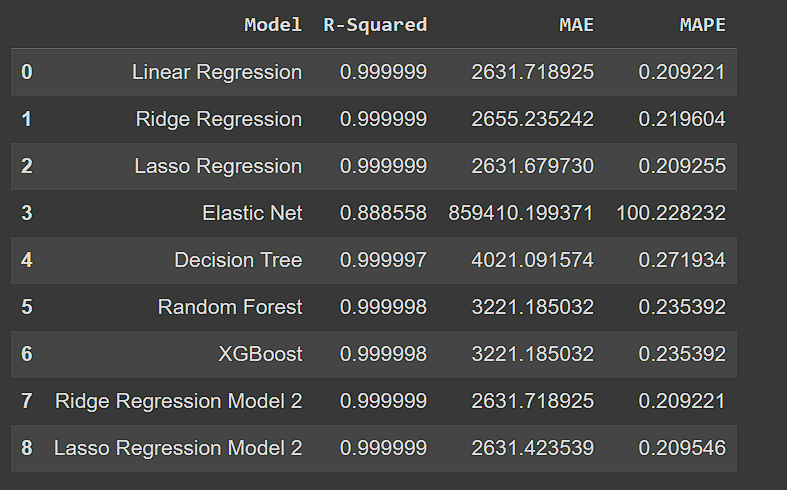

In [ ]:
X = X.drop(['const'], axis=1)
X

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,2005,75523,3,0,7
1,2015,80771,39,1,2
2,2021,55712,58,1,9
3,2012,32316,47,0,3
4,1990,70429,19,1,4
...,...,...,...,...,...
9995,2009,1726,89,0,4
9996,1990,44403,29,0,0
9997,2005,83841,3,1,9
9998,2010,59036,70,1,4


# Data Pre-Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store label encoders
label_encoders = {}

# Loop through categorical columns and fit label encoders
for col in X_train.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])

In [ ]:
# Tranforming X_test data
for col in X_test.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        X_test[col] = label_encoders[col].transform(X_test[col])

In [ ]:
import pickle
# Save the fitted label encoders for future use
with open('/content/drive/MyDrive/dataset/label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [ ]:
# Feature Scaling
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Create a DataFrame to store model evaluation metrics
evaluation_df_train = pd.DataFrame(columns=['Model', 'R-Squared', 'MAE', 'MAPE'])
evaluation_df_test  = pd.DataFrame(columns=['Model', 'R-Squared', 'MAE', 'MAPE'])

# Machine Learning Algorithm

Based on EDA, it can be seen that the variable that has the highest correlation with the variable to be predicted (price) is square room or land area. Other variables have correlations as well, but are not significant compared to these variables. Another conclusion that can be drawn is that the two variables are linearly related, so the linear regression model and its development are suitable for use.

## Training Algorithm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_preds_train = linear_reg_model.predict(X_train)

# Evaluate Linear Regression
r2_linear_train = r2_score(y_train, linear_reg_preds_train)
mae_linear_train = mean_absolute_error(y_train, linear_reg_preds_train)
mape_linear_train = (abs((y_train - linear_reg_preds_train) / y_train)).mean() * 100

evaluation_df_train  = evaluation_df_train.append({'Model': 'Linear Regression', 'R-Squared': r2_linear_train, 'MAE': mae_linear_train, 'MAPE': mape_linear_train}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_preds_train = ridge_model.predict(X_train)

# Evaluate Ridge Regression
r2_ridge_train = r2_score(y_train, ridge_preds_train)
mae_ridge_train = mean_absolute_error(y_train, ridge_preds_train)
mape_ridge_train = (abs((y_train - ridge_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Ridge Regression', 'R-Squared': r2_ridge_train, 'MAE': mae_ridge_train, 'MAPE': mape_ridge_train}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_preds_train = lasso_model.predict(X_train)

# Evaluate Lasso Regression
r2_lasso_train = r2_score(y_train, lasso_preds_train)
mae_lasso_train = mean_absolute_error(y_train, lasso_preds_train)
mape_lasso_train = (abs((y_train - lasso_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Lasso Regression', 'R-Squared': r2_lasso_train, 'MAE': mae_lasso_train, 'MAPE': mape_lasso_train}, ignore_index=True)

# Elastic Net
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)
elastic_net_preds_train = elastic_net_model.predict(X_train)

# Evaluate Elastic Net
r2_elastic_net_train = r2_score(y_train, elastic_net_preds_train)
mae_elastic_net_train = mean_absolute_error(y_train, elastic_net_preds_train)
mape_elastic_net_train = (abs((y_train - elastic_net_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Elastic Net', 'R-Squared': r2_elastic_net_train, 'MAE': mae_elastic_net_train, 'MAPE': mape_elastic_net_train}, ignore_index=True)

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth = 10)
dt_model.fit(X_train, y_train)
dt_preds_train = dt_model.predict(X_train)

# Evaluate Decision Tree
r2_dt_train = r2_score(y_train, dt_preds_train)
mae_dt_train = mean_absolute_error(y_train, dt_preds_train)
mape_dt_train = (abs((y_train - dt_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Decision Tree', 'R-Squared': r2_dt_train, 'MAE': mae_dt_train, 'MAPE': mape_dt_train}, ignore_index=True)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds_train = rf_model.predict(X_train)

# Evaluate Random Forest
r2_rf_train = r2_score(y_train, rf_preds_train)
mae_rf_train = mean_absolute_error(y_train, rf_preds_train)
mape_rf_train = (abs((y_train - rf_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Random Forest', 'R-Squared': r2_rf_train, 'MAE': mae_rf_train, 'MAPE': mape_rf_train}, ignore_index=True)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_preds_train = xgb_model.predict(X_train)

# Evaluate XGBoost
r2_xgb_train = r2_score(y_train, xgb_preds_train)
mae_xgb_train = mean_absolute_error(y_train, xgb_preds_train)
mape_xgb_train = (abs((y_train - xgb_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'XGBoost', 'R-Squared': r2_xgb_train, 'MAE': mae_xgb_train, 'MAPE': mape_xgb_train}, ignore_index=True)


## Testing Algorithm

In [ ]:
# Linear Regression
linear_reg_preds = linear_reg_model.predict(X_test)

# Evaluate Linear Regression
r2_linear   = r2_score(y_test, linear_reg_preds)
mae_linear  = mean_absolute_error(y_test, linear_reg_preds)
mape_linear = (abs((y_test - linear_reg_preds) / y_test)).mean() * 100

evaluation_df_test  = evaluation_df_test.append({'Model': 'Linear Regression', 'R-Squared': r2_linear, 'MAE': mae_linear, 'MAPE': mape_linear}, ignore_index=True)

# Ridge Regression
ridge_preds = ridge_model.predict(X_test)

# Evaluate Ridge Regression
r2_ridge = r2_score(y_test, ridge_preds)
mae_ridge = mean_absolute_error(y_test, ridge_preds)
mape_ridge = (abs((y_test - ridge_preds) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'Ridge Regression', 'R-Squared': r2_ridge, 'MAE': mae_ridge, 'MAPE': mape_ridge}, ignore_index=True)

# Lasso Regression
lasso_preds = lasso_model.predict(X_test)

# Evaluate Lasso Regression
r2_lasso = r2_score(y_test, lasso_preds)
mae_lasso = mean_absolute_error(y_test, lasso_preds)
mape_lasso = (abs((y_test - lasso_preds) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'Lasso Regression', 'R-Squared': r2_lasso, 'MAE': mae_lasso, 'MAPE': mape_lasso}, ignore_index=True)

# Elastic Net
elastic_net_preds = elastic_net_model.predict(X_test)

# Evaluate Elastic Net
r2_elastic_net = r2_score(y_test, elastic_net_preds)
mae_elastic_net = mean_absolute_error(y_test, elastic_net_preds)
mape_elastic_net = (abs((y_test - elastic_net_preds) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'Elastic Net', 'R-Squared': r2_elastic_net, 'MAE': mae_elastic_net, 'MAPE': mape_elastic_net}, ignore_index=True)

# Decision Tree
dt_preds = dt_model.predict(X_test)

# Evaluate Decision Tree
r2_dt = r2_score(y_test, dt_preds)
mae_dt = mean_absolute_error(y_test, dt_preds)
mape_dt = (abs((y_test - dt_preds) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'Decision Tree', 'R-Squared': r2_dt, 'MAE': mae_dt, 'MAPE': mape_dt}, ignore_index=True)

# Random Forest
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, rf_preds)
mae_rf = mean_absolute_error(y_test, rf_preds)
mape_rf = (abs((y_test - rf_preds) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'Random Forest', 'R-Squared': r2_rf, 'MAE': mae_rf, 'MAPE': mape_rf}, ignore_index=True)

# XGBoost
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost
r2_xgb = r2_score(y_test, xgb_preds)
mae_xgb = mean_absolute_error(y_test, xgb_preds)
mape_xgb = (abs((y_test - xgb_preds) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'XGBoost', 'R-Squared': r2_rf, 'MAE': mae_rf, 'MAPE': mape_rf}, ignore_index=True)


In [ ]:
evaluation_df_train

,Model,R-Squared,MAE,MAPE
0,Linear Regression,0.999999,2645.537109,0.193167
1,Ridge Regression,0.999999,2659.150904,0.200527
2,Lasso Regression,0.999999,2645.512710,0.193189
3,Elastic Net,0.888888,821226.498025,95.176368
4,Decision Tree,0.999999,2494.408196,0.180197
5,Random Forest,1.000000,1174.075006,0.084440
6,XGBoost,0.999989,7526.470584,0.420860


In [ ]:
evaluation_df_test

,Model,R-Squared,MAE,MAPE
0,Linear Regression,0.999999,2631.718925,0.209221
1,Ridge Regression,0.999999,2655.235242,0.219604
2,Lasso Regression,0.999999,2631.679730,0.209255
3,Elastic Net,0.888558,859410.199371,100.228232
4,Decision Tree,0.999997,4021.091574,0.271934
5,Random Forest,0.999998,3221.185032,0.235392
6,XGBoost,0.999998,3221.185032,0.235392


From several models attempted initially, it can be seen that almost all models experience underfitting, so optimization is needed. The chosen models are Linear Regression and Lasso Regression, which are the best models among the others.







## Ridge Regression Model Parameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge_reg_model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with different alpha values
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Create the final Ridge Regression model with the best alpha
final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# Training Model
ridge_preds_train = ridge_model.predict(X_train)

# Evaluate Ridge Regression
r2_ridge_train = r2_score(y_train, ridge_preds_train)
mae_ridge_train = mean_absolute_error(y_train, ridge_preds_train)
mape_ridge_train = (abs((y_train - ridge_preds_train) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Ridge Regression Model 2', 'R-Squared': r2_ridge_train, 'MAE': mae_ridge_train, 'MAPE': mape_ridge_train}, ignore_index=True)

In [ ]:
# Testing Model
ridge_preds = ridge_model.predict(X_test)
evaluation_df_test  = evaluation_df_test.append({'Model': 'Ridge Regression Model 2', 'R-Squared': r2_linear, 'MAE': mae_linear, 'MAPE': mape_linear}, ignore_index=True)

## Lasso Regression Model Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the model
lasso_reg_model = Lasso()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create a GridSearchCV object
grid_search = GridSearchCV(lasso_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with different alpha values
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Create the final Lasso Regression model with the best alpha
final_lasso_model = Lasso(alpha=best_alpha)
final_lasso_model.fit(X_train, y_train)

Lasso(alpha=10.0)

In [ ]:
# Training Model
lasso_preds_train2 = final_lasso_model.predict(X_train)

# Evaluate Lasso Regression
r2_lasso_train2 = r2_score(y_train, lasso_preds_train2)
mae_lasso_train2 = mean_absolute_error(y_train, lasso_preds_train2)
mape_lasso_train2 = (abs((y_train - lasso_preds_train2) / y_train)).mean() * 100

evaluation_df_train = evaluation_df_train.append({'Model': 'Lasso Regression Model 2', 'R-Squared': r2_lasso_train2, 'MAE': mae_lasso_train2, 'MAPE': mape_lasso_train2}, ignore_index=True)

In [ ]:
# Testing Model
lasso_preds2 = final_lasso_model.predict(X_test)

# Evaluate Lasso Regression
r2_lasso2 = r2_score(y_test, lasso_preds2)
mae_lasso2 = mean_absolute_error(y_test, lasso_preds2)
mape_lasso2 = (abs((y_test - lasso_preds2) / y_test)).mean() * 100

evaluation_df_test = evaluation_df_test.append({'Model': 'Lasso Regression Model 2', 'R-Squared': r2_lasso2, 'MAE': mae_lasso2, 'MAPE': mape_lasso2}, ignore_index=True)

In [ ]:
evaluation_df_train

,Model,R-Squared,MAE,MAPE
0,Linear Regression,0.999999,2645.537109,0.193167
1,Ridge Regression,0.999999,2659.150904,0.200527
2,Lasso Regression,0.999999,2645.512710,0.193189
3,Elastic Net,0.888888,821226.498025,95.176368
4,Decision Tree,0.999999,2494.408196,0.180197
5,Random Forest,1.000000,1174.075006,0.084440
6,XGBoost,0.999989,7526.470584,0.420860
7,Ridge Regression Model 2,0.999999,2659.150904,0.200527
8,Lasso Regression Model 2,0.999999,2645.352545,0.193406


In [ ]:
evaluation_df_test

,Model,R-Squared,MAE,MAPE
0,Linear Regression,0.999999,2631.718925,0.209221
1,Ridge Regression,0.999999,2655.235242,0.219604
2,Lasso Regression,0.999999,2631.679730,0.209255
3,Elastic Net,0.888558,859410.199371,100.228232
4,Decision Tree,0.999997,4021.091574,0.271934
5,Random Forest,0.999998,3221.185032,0.235392
6,XGBoost,0.999998,3221.185032,0.235392
7,Ridge Regression Model 2,0.999999,2631.718925,0.209221
8,Lasso Regression Model 2,0.999999,2631.423539,0.209546


## Model Evaluation

By using tuning on the ridge regression and lasso regression algorithms, better MAE and MAP values were obtained compared to before.

In [ ]:
X.head(0)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom


In [ ]:
# Ridge Regression
ridge_coefficients = final_ridge_model.coef_
ridge_coefficients

array([ 1.46287501e+01,  2.85555829e+06,  6.70535218e+01,  7.65715403e+00,
       -6.15797281e+01])

In [ ]:
# Lasso Regression
lasso_coefficients = final_lasso_model.coef_
lasso_coefficients

array([ 4.80368880e+00,  2.85558390e+06,  5.71024740e+01,  0.00000000e+00,
       -5.15609846e+01])

**Most Impactful Feature**

Based on the coefficients it can be deducted that squareMeters is the most impactful Feature than the others (2.8e+06).

## Save Model

In [ ]:
# Save Model
import pickle

pickle.dump(linear_reg_model, open('/content/drive/MyDrive/dataset/ridge_reg_model.pkl', 'wb'))
pickle.dump(final_lasso_model, open('/content/drive/MyDrive/dataset/lasso_reg_model.pkl', 'wb'))

# Prediction Using New Dataset

In [ ]:
# Load your data from the CSV file
predict = pd.read_csv('/content/drive/MyDrive/dataset/house_price_predict.csv')
predict.head(10)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,2016,56935,23,1,3
1,1999,41471,32,0,3
2,2021,86758,38,1,2
3,1999,57011,30,1,5
4,2009,41083,13,1,2
5,2009,41510,25,1,1
6,2006,77371,15,0,4
7,2019,88610,24,0,0
8,2020,22189,14,0,5
9,2005,86548,45,0,4


In [ ]:
input_data = predict
input_data.head(10)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,2016,56935,23,1,3
1,1999,41471,32,0,3
2,2021,86758,38,1,2
3,1999,57011,30,1,5
4,2009,41083,13,1,2
5,2009,41510,25,1,1
6,2006,77371,15,0,4
7,2019,88610,24,0,0
8,2020,22189,14,0,5
9,2005,86548,45,0,4


## Ridge Regression Model

In [ ]:
#Load Data
input_data = pd.read_csv('/content/drive/MyDrive/dataset/house_price_predict.csv')
input_data.head(2)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,2016,56935,23,1,3
1,1999,41471,32,0,3


In [ ]:
with open('/content/drive/MyDrive/dataset/ridge_reg_model.pkl', 'rb') as file:
      linear_reg_model = pickle.load(file)

input_data2 = scaler.transform(input_data)
linear_reg_final_preds = linear_reg_model.predict(input_data2)

#Combine Data
output = input_data.copy()
output['Price Prediction'] = linear_reg_final_preds
output

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,Price Prediction
0,2016,56935,23,1,3,5.699912e+06
1,1999,41471,32,0,3,4.153502e+06
2,2021,86758,38,1,2,8.682252e+06
3,1999,57011,30,1,5,5.707462e+06
4,2009,41083,13,1,2,4.114709e+06
5,2009,41510,25,1,1,4.157456e+06
6,2006,77371,15,0,4,7.743427e+06
7,2019,88610,24,0,0,8.867438e+06
8,2020,22189,14,0,5,2.225269e+06
9,2005,86548,45,0,4,8.661188e+06


## Lasso Regression Model

In [ ]:
with open('/content/drive/MyDrive/dataset/lasso_reg_model.pkl', 'rb') as file:
      lasso_reg_model = pickle.load(file)

input_data2 = scaler.transform(input_data)
lasso_reg_final_preds = lasso_reg_model.predict(input_data2)

#Combine Data
output = input_data.copy()
output['Price Prediction'] = lasso_reg_final_preds
output

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,Price Prediction
0,2016,56935,23,1,3,5.699893e+06
1,1999,41471,32,0,3,4.153520e+06
2,2021,86758,38,1,2,8.682209e+06
3,1999,57011,30,1,5,5.707466e+06
4,2009,41083,13,1,2,4.114704e+06
5,2009,41510,25,1,1,4.157444e+06
6,2006,77371,15,0,4,7.743433e+06
7,2019,88610,24,0,0,8.867411e+06
8,2020,22189,14,0,5,2.225284e+06
9,2005,86548,45,0,4,8.661182e+06


# Model Deployment

## Ridge Regression Model

In [ ]:
!pip install flask_ngrok

In [ ]:
!ngrok authtoken 2YxowRQKQrqePQnBIr1NKyNdFuI_3hGVzSEaX5dC5Ed8EiHnD

/bin/bash: line 1: ngrok: command not found


In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from datetime import datetime
from flask.json import JSONEncoder

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/algowizard', methods=['GET'])  # Change 'GET' to 'POST' for JSON data
def batch_32():
    # Load label encoders
    with open('/content/drive/MyDrive/dataset/label_encoders.pkl', 'rb') as file:
        label_encoders = pickle.load(file)

    # Load pickle model
    with open('/content/drive/MyDrive/dataset/ridge_reg_model.pkl', 'rb') as file:
        model = pickle.load(file)

    data = request.json
    input_data = pd.DataFrame(data, index=[0])
    input_data = scaler.transform(input_data)

    # Make Prediction
    prediction = model.predict(input_data)
    print({"status": "Berhasil", "Hasil Prediction": int(prediction[0])})
    return jsonify({"status": "Berhasil", "Hasil Prediction": int(prediction[0])})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://c0e5-34-86-214-255.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Dec/2023 16:07:34] "GET /algowizard HTTP/1.1" 200 -


{'status': 'Berhasil', 'Hasil Prediction': 5699912}


## Lasso Regression Model

In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from datetime import datetime
from flask.json import JSONEncoder

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/algowizard', methods=['GET'])  # Change 'GET' to 'POST' for JSON data
def batch_32():
    # Load label encoders
    with open('/content/drive/MyDrive/dataset/label_encoders.pkl', 'rb') as file:
        label_encoders = pickle.load(file)

    # Load pickle model
    with open('/content/drive/MyDrive/dataset/lasso_reg_model.pkl', 'rb') as file:
        model = pickle.load(file)

    data = request.json
    input_data = pd.DataFrame(data, index=[0])
    input_data = scaler.transform(input_data)

    # Make Prediction
    prediction = model.predict(input_data)
    print({"status": "Berhasil", "Hasil Prediction": int(prediction[0])})
    return jsonify({"status": "Berhasil", "Hasil Prediction": int(prediction[0])})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://28b1-34-86-214-255.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Dec/2023 16:08:33] "GET /algowizard HTTP/1.1" 200 -


{'status': 'Berhasil', 'Hasil Prediction': 5699893}


# Conclusion



Variabel yang paling berpengaruh adalah squareMeters yang dapat dilihat nilainya pada Section Model Evaluation.

Evaluate:

Ridge Regression Model After Hyper Parameter Tuning

**Before**

> R-Squared : 0.999999
> MAE       : 2655.235242
> MAPE      : 0.219604

**After**

> R-Squared : 0.999999
> MAE       : 2631.718925
> MAPE      : 0.209221

Evaluate:

Lasso Regression Model After Hyper Parameter Tuning

**Before**

> R-Squared : 0.999999
> MAE       : 2631.679730
> MAPE      : 0.209255

**After**

> R-Squared : 0.999999
> MAE       : 2631.423539
> MAPE      : 0.209546

**Future Works**
- Perbaikan hasil dengan mencoba menggunakan berbagai opsi Hyperparameter Tuning
